In [1]:
import pyanitools as pyt
#import pyaniasetools as aat
import pyNeuroChem as pyc
import hdnntools as hdt
import numpy as np

from ase_interface import ANIENS
from ase_interface import ensemblemolecule
from ase.atoms import Atoms

import matplotlib.pyplot as plt

import os

/scratch/Anaconda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


van Der Waals correction will be unavailable. Please install ased3


In [2]:
h5path = '/nh/nest/u/jsmith/Research/tin_research/h5files/'

wkdir = '/nh/nest/u/jsmith/scratch/Research/tin_research/model-70/'

cns = wkdir + '/train0/rSn-7.0R_32-7.0A_a8-8.params'
sae = wkdir + '/train0/sae_linfit.dat'
nnf = wkdir + '/train'
Nn = 4

In [3]:
h5files = os.listdir(h5path)

comp_data = {}

for f in h5files:
    adl = pyt.anidataloader(h5path+f)
    for i,data in enumerate(adl):
        opath = '/'+f+data['path']
        Nc = data['energy'].size
        key = data['species'][0]+str(len(data['species']))
        idx = np.argsort(data['species'])
        
        if key in comp_data:
            comp_data[key]['coordinates'].extend([data['coordinates'][j][idx] for j in range(Nc)])
            comp_data[key]['force'].extend([data['force'][j][idx] for j in range(Nc)])
            comp_data[key]['energy'].append(data['energy'])
            comp_data[key]['opath'].extend([opath+'-'+str(j) for j in range(Nc)])
        else:
            comp_data[key] = {'coordinates':[data['coordinates'][j][idx] for j in range(Nc)],
                              'force':[data['force'][j][idx] for j in range(Nc)],
                              'energy':[data['energy']],
                              'species':list(np.array(data['species'])[idx]),
                              'opath':[opath+'-'+str(j) for j in range(Nc)]}
            
for key in comp_data.keys():
    comp_data[key]['coordinates'] = np.stack(comp_data[key]['coordinates'])
    comp_data[key]['force'] = np.stack(comp_data[key]['force'])
    comp_data[key]['energy'] = np.concatenate(comp_data[key]['energy'])
    comp_data[key]['opath'] = np.array(comp_data[key]['opath'])

In [4]:
aens = ensemblemolecule(cns, sae, nnf, Nn, 0)

L=16.0
cell = np.array([[L, 0, 0],
                 [0, L, 0],
                 [0, 0, L]],dtype=np.float32)

celi = (np.linalg.inv(cell)).astype(np.float32)

aens.set_pbc(True,True,True)
aens.set_cell((cell).astype(np.float32), celi)

In [6]:
dE = []
Na = []

dpack = pyt.datapacker('/nh/nest/u/jsmith/Research/tin_research/Sn_0-31_c.h5')
for key in comp_data.keys():
    print(key)
    S = comp_data[key]['species']
    
    kidx = []
    for i,(e,f,x) in enumerate(zip(comp_data[key]['energy'],comp_data[key]['force'],comp_data[key]['coordinates'])):
        aens.set_molecule(X=x,S=S)
        ea,fa,es,fs = aens.compute_mean_props()
        if 1000*hdt.hatoev*np.abs(ea-e)/len(S) > 18.0:
            print(comp_data[key]['opath'][i],1000*hdt.hatoev*np.abs(ea-e)/len(S))
        else:
            kidx.append(i)
        Na.append(len(S))
        dE.append(1000*hdt.hatoev*np.abs(ea-e)/len(S))
        
    print(kidx)
    if comp_data[key]['energy'][kidx].size > 0:
        dpack.store_data('/'+key,coordinates=comp_data[key]['coordinates'][kidx]
                                ,energy=comp_data[key]['energy'][kidx]
                                ,force=comp_data[key]['force'][kidx]
                                ,species=list(S)
                                ,opath=list(comp_data[key]['opath'][kidx]))
dpack.cleanup()

Sn97
[0, 1, 2, 3, 4, 5, 6, 7]
Sn109
[0, 1, 2]
Sn98
[0, 1, 2, 3, 4, 5, 6]
Sn121
[0, 1, 2, 3]
Sn94
[0, 1, 2, 3, 4, 5]
Sn118
[0, 1, 2, 3, 4, 5]
Sn112
[0]
Sn96
[0, 1, 2, 3]
Sn115
[0, 1, 2]
Sn104
[0, 1, 2]
Sn110
[0, 1, 2]
Sn83
[0, 1, 2, 3, 4, 5]
Sn75
[0, 1, 2, 3, 4, 5, 6]
Sn111
[0, 1, 2, 3]
Sn100
[0, 1, 2, 3, 4, 5, 6]
Sn128
[0, 1, 2, 3]
Sn120
[0, 1, 2, 3, 4, 5, 6, 7, 8]
Sn105
[0, 1, 2, 3]
Sn103
[0, 1, 2]
Sn74
[0, 1]
Sn87
[0, 1, 2]
Sn77
[0, 1, 2]
Sn80
[0, 1, 2, 3]
Sn90
[0, 1, 2]
Sn73
[0, 1]
Sn84
[0, 1, 2]
Sn57
[0, 1, 2, 3, 4, 5, 6, 7]
Sn99
[0, 1]
Sn82
[0, 1, 2, 3, 4]
Sn88
[0, 1]
Sn93
[0]
Sn91
[0]
Sn79
[0, 1, 2, 3, 4]
Sn78
[0]
Sn70
[0, 1, 2]
Sn167
[0, 1]
Sn136
[0, 1, 2]
Sn76
[0, 1]
Sn107
[0, 1, 2]
Sn134
[0, 1, 2, 3, 4, 5]
Sn86
[0, 1]
Sn64
[0, 1, 2, 3, 4]
Sn113
[0, 1, 2, 3]
Sn124
[0, 1, 2]
Sn126
[0, 1]
Sn89
[0, 1]
Sn127
[0, 1, 2, 3]
Sn63
[0, 1, 2]
Sn117
[0, 1, 2, 3, 4]
Sn119
/data-14.h5/5-1 19.472017618418718
[0, 2, 3]
Sn122
[0]
Sn144
[0, 1, 2]
Sn145
[0]
Sn131
[0, 1, 2, 3, 4]
Sn151
[0, 1, 2]
S

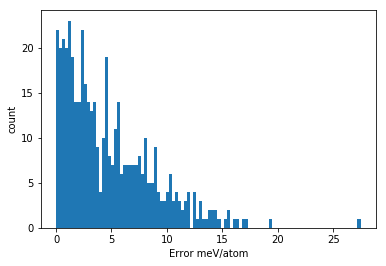

In [7]:
dE = np.array(dE)
plt.hist(dE,bins=100)
plt.xlabel("Error meV/atom")
plt.ylabel("count")
plt.show()

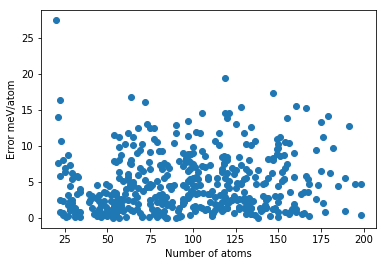

In [8]:
plt.scatter(Na,dE)
plt.xlabel("Number of atoms")
plt.ylabel("Error meV/atom")
plt.show()

In [18]:
class test:
    var = 0

i = None
if not i:
    print('none')
else:
    print('class')

none
